# Path projects  of the developer

# Get name and photo of the developer 

from IPython.display import clear_output
clear_output(wait=True)

import requests

gitUserName="aleen42"
url = 'https://api.github.com/users/'+gitUserName
data = requests.get(url).json()
authorTarget=data['name']
avatar_url=data['avatar_url']
#email=data['email']

In [1]:
from IPython.display import clear_output 

clear_output(wait=True)

import requests

gitUserName="arora-aditya" 

username = 'cleitonsilvat'
token = '348141effb41cf4c95f201a7d126b2c68ff002c4'

data = requests.get('https://api.github.com/users/'+gitUserName, auth=(username,token)).json()

authorTarget=data['name'] 
avatar_url=data['avatar_url']


import csv
row_list = [[gitUserName, email]]

with open('/media/johnatan/SAMSUNG/emails.csv', 'a', newline='') as file:
    writer = csv.writer(file, quoting=csv.QUOTE_NONNUMERIC, delimiter=';')
    writer.writerows(row_list)

In [2]:
import os  

pathProjects="/media/johnatan/SAMSUNG/SANER2021/"+gitUserName+"/"
pathProjectsO=pathProjects
os.chdir(pathProjects)

try:
    os.remove(".ghcloneallrc")
    os.remove(".httpcache.sqlite")
except:
    print("Not there are")

In [3]:
from scipy.interpolate import interp1d
import numpy as np

import shlex
import subprocess as sp

import prettyplotlib as ppl
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import io
from pandas import read_csv

import pandas as pd
import os
from pandas import read_csv

filenames= os.listdir (".")
commit_data = pd.DataFrame()
commit_data2 = pd.DataFrame()
commit_dataEmail = pd.DataFrame()



for file in filenames:
    os.chdir(pathProjects+file)
    #cmd = "git log --no-merges --author='"+authorTarget+"' --name-status --pretty='format:'"
    cmd="git log --no-renames --numstat --author='"+authorTarget+"' --pretty=format:'%x09%x09%x09%aN%ce'"
    p = sp.Popen(shlex.split(cmd), stdout=sp.PIPE)
    stdout, _ = p.communicate()
    os.chdir(pathProjects)
    table = read_csv(io.StringIO(stdout.decode('utf-8')), sep='\t',names=['additions', 'deletions', 'path','author'],parse_dates=True).fillna(method='ffill').dropna()
    temp = pd.DataFrame(table)
    temp = temp.drop_duplicates(subset='path', keep='first')
    commit_data = pd.concat([commit_data, temp])   


In [4]:
commit_data

,additions,deletions,path,author
1,11,0,README.md,Aditya Aroranoreply@github.com
1,9,9,src/components/navbar/index.tsx,Aditya Arora10962267+arora-aditya@users.norepl...
3,1,0,public/_redirects,Aditya Arora10962267+arora-aditya@users.norepl...
4,3,3,src/App.tsx,Aditya Arora10962267+arora-aditya@users.norepl...
6,0,29,.github/workflows/deploy-to-gh-pages.yml,Aditya Arora10962267+arora-aditya@users.norepl...
...,...,...,...,...
5,1,1,index.html,Aditya Aroranoreply@github.com
23,16910,0,d3.v4.js,Aditya Aroranoreply@github.com
24,4,0,jquery.js,Aditya Aroranoreply@github.com
26,-,-,speedReading.gif,Aditya Aroranoreply@github.com


In [5]:
#emails=commit_data.drop_duplicates(['author'])

#email=emails['author'].iloc[0]
#email
#cmd="git log --no-renames --numstat --author='"+authorTarget+"' --pretty=format:'%x09%x09%x09%aN%ce'"


import csv 

#emails=commit_dataEmail.drop_duplicates(['email'])

#email=emails['email'].iloc[0]

row_list = [[gitUserName, email]]

with open('/media/johnatan/SAMSUNG/emails2.csv', 'a', newline='') as file: 
    writer = csv.writer(file, quoting=csv.QUOTE_NONNUMERIC, delimiter=';') 
    writer.writerows(row_list)

In [6]:
#Identify testers (Matheus)

commit_data['Test'] = commit_data['path'].str.contains(r'/test/|/tests/',regex=True)
commit_data.head()

,additions,deletions,path,author,Test
1,11,0,README.md,Aditya Aroranoreply@github.com,False
1,9,9,src/components/navbar/index.tsx,Aditya Arora10962267+arora-aditya@users.norepl...,False
3,1,0,public/_redirects,Aditya Arora10962267+arora-aditya@users.norepl...,False
4,3,3,src/App.tsx,Aditya Arora10962267+arora-aditya@users.norepl...,False
6,0,29,.github/workflows/deploy-to-gh-pages.yml,Aditya Arora10962267+arora-aditya@users.norepl...,False


In [7]:
data_tests = commit_data[commit_data['Test']==True]
data_tests.head()

,additions,deletions,path,author,Test
391,2,1,DPLL/test/sample18.cnf,Aditya Arora10962267+arora-aditya@users.norepl...,True
392,2,1,DPLL/test/sample20.cnf,Aditya Arora10962267+arora-aditya@users.norepl...,True
393,2,1,DPLL/test/sample21.cnf,Aditya Arora10962267+arora-aditya@users.norepl...,True
394,2,1,DPLL/test/sample28.cnf,Aditya Arora10962267+arora-aditya@users.norepl...,True
395,2,1,DPLL/test/sample40.cnf,Aditya Arora10962267+arora-aditya@users.norepl...,True


# Count test files

In [8]:
count_tests = len(data_tests)
count_tests

240

In [9]:
data_tests['additions']=data_tests['additions'].astype(str)
data_tests['deletions']=data_tests['deletions'].astype(str)

/home/johnatan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/johnatan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Count  LOC test 

In [10]:
# we comput additions+deletions= total  wrote 
from pathlib import Path

if count_tests != 0:
    
    dfTestLoc=pd.DataFrame()
    data_tests.filter(items=['path'])
    data_tests['path']=data_tests.path.str.rsplit('.', 1).str[-1]
    

    data_tests.loc[data_tests['additions'].str.contains(r'[-]+') == False]
    data_tests.loc[data_tests['deletions'].str.contains(r'[-]+') == False]

    data_tests=data_tests.replace('\-',0,regex=True)#.astype(int)

    data_tests['deletions'] = data_tests['deletions'].astype(float)
    data_tests['additions'] = data_tests['additions'].astype(float)
    
    data_tests['deletions'] = data_tests['deletions'].astype(int)
    data_tests['additions'] = data_tests['additions'].astype(int)



    data_tests['loc'] = data_tests.apply(lambda x: x['additions'] + x['deletions'], axis=1)
    dfTestLoc=data_tests


    dfTestLoc=dfTestLoc.groupby(['path'])['loc'].agg('sum')

    dfTestLoc= dfTestLoc.reset_index() 
    dfTestLoc.head()



/home/johnatan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#dfTestLoc.head()

In [12]:
if count_tests != 0:
    locTest=dfTestLoc['loc'].sum()
    locTest

In [13]:
import os
os.chdir(pathProjects)


filenames= os.listdir (".") # get all files' and folders' names in the current directory

result = []
for filename in filenames: # loop through all the files and folders
    if os.path.isdir(os.path.join(os.path.abspath("."), filename)): # check whether the current object is a folder or not
        result.append(filename)
        
result.sort()

len(result)
#result

29

# File extensions

In [14]:
from pathlib import Path

commit_data.filter(items=['path'])
#commit_data['File'] = commit_data.File.apply(lambda x: x.split('.')[-1])
commit_data['path']=commit_data.path.str.rsplit('.', 1).str[-1]
commit_data.head()

,additions,deletions,path,author,Test
1,11,0,md,Aditya Aroranoreply@github.com,False
1,9,9,tsx,Aditya Arora10962267+arora-aditya@users.norepl...,False
3,1,0,public/_redirects,Aditya Arora10962267+arora-aditya@users.norepl...,False
4,3,3,tsx,Aditya Arora10962267+arora-aditya@users.norepl...,False
6,0,29,yml,Aditya Arora10962267+arora-aditya@users.norepl...,False


In [15]:
#commit_data.loc[commit_data['additions'].str.contains(r'[-]+') == False]
#pd.to_datetime(df['Date'].astype(str)).dt.year == 2019  # you compare ints


#  Compute lines of code

In [16]:
# we comput additions+deletions= total  wrote  verificar pau 

commit_data.loc[commit_data['additions'].str.contains(r'[-]+') == False]
commit_data.loc[commit_data['deletions'].str.contains(r'[-]+') == False]

commit_data=commit_data.replace('\-',0,regex=True)#.astype(int)


commit_data['deletions'] = commit_data['deletions'].astype(float)
commit_data['additions'] = commit_data['additions'].astype(float)

commit_data['deletions'] = commit_data['deletions'].astype(int)
commit_data['additions'] = commit_data['additions'].astype(int)



commit_data['loc'] = commit_data.apply(lambda x: x['additions'] + x['deletions'], axis=1)
newCommit_data=commit_data.copy() 
newCommit_data

,additions,deletions,path,author,Test,loc
1,11,0,md,Aditya Aroranoreply@github.com,False,11
1,9,9,tsx,0,False,18
3,1,0,public/_redirects,0,False,1
4,3,3,tsx,0,False,6
6,0,29,yml,0,False,29
...,...,...,...,...,...,...
5,1,1,html,Aditya Aroranoreply@github.com,False,2
23,16910,0,js,Aditya Aroranoreply@github.com,False,16910
24,4,0,js,Aditya Aroranoreply@github.com,False,4
26,0,0,gif,Aditya Aroranoreply@github.com,False,0


In [17]:
#commit_data=commit_data.groupby(['path'])['loc'].agg('sum')
newCommit_data=newCommit_data.groupby(['path'])['loc'].agg('sum')

newCommit_data= newCommit_data.reset_index() 
newCommit_data.head()

,path,loc
0,0,51483
1,1,0
2,API_Examples/Example_ADC_with_PWM_LED/Debug/ma...,251
3,API_Examples/Example_ADC_with_PWM_LED/Example_...,191
4,API_Examples/Example_Keypad/Debug/makefile,191


In [18]:
newCommit_data.sort_values(by=['loc'],ascending=False).head()

,path,loc
761,ppm,4510558
55,csv,1599616
791,txt,504286
70,h,122921
797,xml,106121


# Identify programming languagens by extension and Author

In [19]:
#BY author  by Author  Java
java=commit_data.path.str.contains(r'java$',regex=True).sum()

try:
    javaLoc=newCommit_data.loc[newCommit_data['path'] == 'java']
    javaLoc=javaLoc.iloc[0]['loc']
except:
    javaLoc = 0
print(java,javaLoc)

0 0


In [20]:
#amount  files GO in total 
go=commit_data.path.str.contains(r'go$',regex=True).sum()

try:
    goLoc=newCommit_data.loc[newCommit_data['path'] == 'go']
    goLoc=goLoc.iloc[0]['loc']
except:
    goLoc=0
print(go,goLoc)

0 0


In [21]:
#amount  files CSS by Author  Andrew Audibert
css=commit_data.path.str.contains(r'css$',regex=True).sum()

try:
    cssLoc=newCommit_data.loc[newCommit_data['path'] == 'css']
    cssLoc=cssLoc.iloc[0]['loc']
except:
    cssLoc=0
print(css,cssLoc)

53 12738


In [22]:
#amount  files HTML in total 
html=commit_data.path.str.contains(r'html$',regex=True).sum()
html

try:
    htmlLoc=newCommit_data.loc[newCommit_data['path'] == 'html']
    htmlLoc=htmlLoc.iloc[0]['loc']
except:
    htmlLoc=0
print(html,htmlLoc)

94 86962


In [23]:
#amount  files JSP in total 
jsp=commit_data.path.str.contains(r'jsp$',regex=True).sum()
jsp

try:
    jspLoc=newCommit_data.loc[newCommit_data['path'] == 'jsp']
    jspLoc=jspLoc.iloc[0]['loc']
except:
    jspLoc=0
print(jsp,jspLoc)

0 0


In [24]:
#amount  files JS in total 
js=commit_data.path.str.contains(r'js$',regex=True).sum()


try:
    jsLoc=newCommit_data.loc[newCommit_data['path'] == 'js']
    jsLoc=jsLoc.iloc[0]['loc']
except:
    jsLoc=0
print(js,jsLoc)

102 25862


In [25]:
#amount  files Python in total 
py=commit_data.path.str.contains(r'py$',regex=True).sum()

try:
    pyLoc=newCommit_data.loc[newCommit_data['path'] == 'py']
    pyLoc=pyLoc.iloc[0]['loc']
except:
    pyLoc=0
print(py,pyLoc)

560 14161


In [26]:
#amount  files PHP in total 
php=commit_data.path.str.contains(r'php$',regex=True).sum()

try:
    phpLoc=newCommit_data.loc[newCommit_data['path'] == 'php']
    phpLoc=phpLoc.iloc[0]['loc']
except:
    phpLoc=0
print(php,phpLoc)

0 0


In [27]:
#amount  files Ruby in total 
rb=commit_data.path.str.contains(r'rb$',regex=True).sum()

try:
    rbLoc=newCommit_data.loc[newCommit_data['path'] == 'rb']
    rbLoc=rbLoc.iloc[0]['loc']
except:
    rbLoc=0
print(rb,rbLoc)

0 0


In [28]:
#amount  files C in total 
c=commit_data.path.str.contains(r'c$',regex=True).sum()

try:
    cLoc=newCommit_data.loc[newCommit_data['path'] == 'c']
    cLoc=cLoc.iloc[0]['loc']
except:
    cLoc=0
print(c,cLoc)

204 54705


In [29]:
#amount  files C++ in total 
cpp=commit_data.path.str.contains(r'cpp$',regex=True).sum()

try:
    cppLoc=newCommit_data.loc[newCommit_data['path'] == 'cpp']
    cppLoc=cppLoc.iloc[0]['loc']
except:
    cppLoc=0
print(cpp,cppLoc)

116 13261


# Files committed in total by specific author

In [30]:
#Soma a quantidade de arquivos que o desenvolvedor fez commit. Todas as linguagens 
modificadosTotal=np.sum(go+java+c+html+rb+js+css+jsp+py+php+cpp)
modificadosTotal

1129

In [31]:
locTotal=np.sum(goLoc+javaLoc+cLoc+htmlLoc+rbLoc+jsLoc+cssLoc+jspLoc+pyLoc+phpLoc+cppLoc)
locTotal

207689

In [32]:
#Val absolute

import pandas as pd 
  
# intialise data of lists. 
data = {'Language':['Java', 'Go', 'CSS', 'HTML','JSP','Javascript','Python','PHP','Ruby','C','C++'],'Files Commit':[java, go, css, html,jsp,js,py,php,rb,c,cpp]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 

# for column
df['Files Commit'] = df['Files Commit'].replace(np.nan, 0)
# Print the output.  
dfLanguages=df.sort_values(by=['Files Commit'], ascending=False)


In [33]:
#Linguagens com pelo menos 1 arquivo comitado
dfLanguages= dfLanguages[dfLanguages['Files Commit'] != 0]
dfnewLanguages = dfLanguages.copy() 
dfnewLanguages

,Language,Files Commit
6,Python,560
9,C,204
10,C++,116
5,Javascript,102
3,HTML,94
2,CSS,53


In [34]:
#Quantidade de linguagens
qntLinguagens=dfLanguages.shape[0] 
qntLinguagens

6

In [35]:
#Val absolute

import pandas as pd 
  
# intialise data of lists. 
data = {'Language':['Java', 'Go', 'CSS', 'HTML','JSP','Javascript','Python','PHP','Ruby','C','C++'],'Loc':[javaLoc, goLoc, cssLoc, htmlLoc,jspLoc,jsLoc,pyLoc,phpLoc,rbLoc,cLoc,cppLoc]} 
  
dfLoc = pd.DataFrame(data) 

# for column
dfLoc['Loc'] = dfLoc['Loc'].replace(np.nan, 0)
# Print the output.  
dfLoc=dfLoc.sort_values(by=['Loc'], ascending=False)
dfLoc

,Language,Loc
3,HTML,86962
9,C,54705
5,Javascript,25862
6,Python,14161
10,C++,13261
2,CSS,12738
0,Java,0
1,Go,0
4,JSP,0
7,PHP,0


In [36]:
# remove loc with 0
dfLoc= dfLoc[dfLoc['Loc'] != 0]
dfLoc

,Language,Loc
3,HTML,86962
9,C,54705
5,Javascript,25862
6,Python,14161
10,C++,13261
2,CSS,12738


# Percentage LOC 

In [37]:
dfLocPercent = dfLoc['Loc'].div(locTotal).round(2)
dfLocPercent = pd.DataFrame(dfLocPercent) 

dfLocPercent= dfLocPercent[dfLocPercent['Loc'] != 0]
dfLocPercent

,Loc
3,0.42
9,0.26
5,0.12
6,0.07
10,0.06
2,0.06


# Percentage LOC Test

In [38]:
#Values in percentage 

#dfTestLoc['loc'] = dfTestLoc['loc'].div(locTotal).round(2)

#remove o 0
#dfTestLoc= dfTestLoc[dfTestLoc['loc'] != 0]
#dfTestLoc

In [39]:

try:
    dfTestLoc['loc']=dfTestLoc['loc'].astype(str)

    jsLocTest=dfTestLoc.loc[dfTestLoc['path'] == 'js']
    jsLocTest=jsLocTest.iloc[0]['loc']
    jsLocTest=int(jsLocTest)
except:
    jsLocTest=0


#try:
#    jspLocTest=dfTestLoc.loc[dfTestLoc['path'] == 'jsp']
#    jspLocTest=jspLocTest.iloc[0]['loc']
#    jspLocTest=int(jspLocTest)
#except:
#    jspLocTest=0

try:
    javaLocTest=dfTestLoc.loc[dfTestLoc['path'] == 'java']
    javaLocTest=javaLocTest.iloc[0]['loc']
    javaLocTest=int(javaLocTest)
except:
    javaLocTest=0
    
try:
    goLocTest=dfTestLoc.loc[dfTestLoc['path'] == 'go']
    goLocTest=goLocTest.iloc[0]['loc']
    goLocTest=int(goLocTest)
except:
    goLocTest=0

try:
    rbLocTest=dfTestLoc.loc[dfTestLoc['path'] == 'rb']
    rbLocTest=rbLocTest.iloc[0]['loc']
    rbLocTest=int(rbLocTest)
except:
    rbLocTest=0

try:
    pyLocTest=dfTestLoc.loc[dfTestLoc['path'] == 'py']
    pyLocTest=pyLocTest.iloc[0]['loc']
    pyLocTest=int(pyLocTest)
except:
    pyLocTest=0

try:
    phpLocTest=dfTestLoc.loc[dfTestLoc['path'] == 'php']
    phpLocTest=phpLocTest.iloc[0]['loc']
    phpLocTest=int(phpLocTest)
except:
    phpLocTest=0

try:
    cLocTest=dfTestLoc.loc[dfTestLoc['path'] == 'c']
    cLocTest=cLocTest.iloc[0]['loc']
    cLocTest=int(cLocTest)
except:
    cLocTest=0
    
try:
    cppLocTest=dfTestLoc.loc[dfTestLoc['path'] == 'cpp']
    cppLocTest=cppLocTest.iloc[0]['loc']
    cppLocTest=int(cppLocTest)
except:
    cppLocTest=0

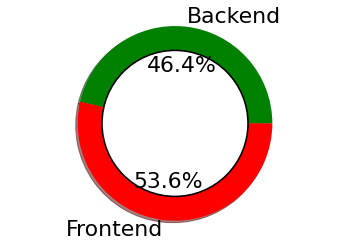

In [40]:

#COmpute front and back from loc

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})# change font size

#Front : js html, jsp, css
#back: java, go, Ruby,js, py,php,c,cpp
backLoc=np.sum(javaLoc+ goLoc+ rbLoc+jsLoc+ pyLoc+phpLoc+cLoc+cppLoc)
frontLoc=np.sum(jsLoc+htmlLoc+jspLoc+cssLoc)

try:
    backLoc=backLoc/locTotal
    backLoc=round(backLoc,2)
except ZeroDivisionError:
    backLoc = 0

try:
    frontLoc=frontLoc/locTotal
    frontLoc=round(frontLoc,2)
except ZeroDivisionError:
    frontLoc = 0
    


# The slices will be ordered and plotted counter-clockwise.
labels = 'Backend', 'Frontend'
sizes = [backLoc, frontLoc]
colors = ['green', 'red']
explode = (0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.60)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('backfrontLoc.png')

plt.show()

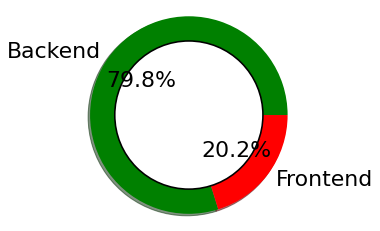

In [41]:
#COmpute front and back from Commits
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})# change font size

#Front : js html, jsp, css
frontCommit=[js,html,jsp,css]
#back: java, go, Ruby,js, py,php,c,cpp
backCommit=[java,go,rb,js,py,php,c,cpp]

backCommit=np.sum(java+ go+ rb+js+ py+php+c+cpp)
frontCommit=np.sum(js+html+jsp+css)


try:
    backCommit=backCommit/modificadosTotal
    backCommit=round(backCommit,2)
except ZeroDivisionError:
    backCommit = 0

try:
    frontCommit=frontCommit/modificadosTotal
    frontCommit=round(frontCommit,2)
except ZeroDivisionError:
    frontCommit = 0
    

# The slices will be ordered and plotted counter-clockwise.
labels = 'Backend', 'Frontend'
sizes = [backCommit, frontCommit]
colors = ['green', 'red']
explode = (0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.60)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('backfrontCommits.png')

plt.show()

# Test commits  files 

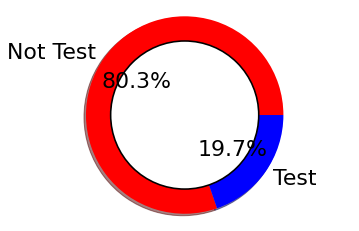

In [42]:
back=[java, go, rb,js, py,php,c,cpp]

back=np.count_nonzero(back)
total=back+count_tests

#back=(back/total)*100
calc=back/total

calc=round(back,2)

#count % test
test = count_tests/total
test=round(test,2)


# The slices will be ordered and plotted counter-clockwise.
labels = 'Not Test', 'Test'
sizes = [calc, test]
colors = ['red', 'blue']
explode = (0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.60)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('fileCommitTest.png')

plt.show()

# LOC Test CHart

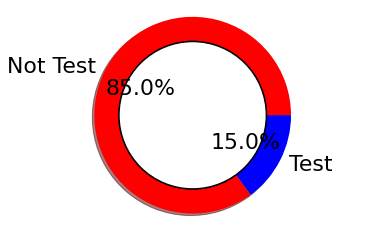

In [43]:
if count_tests != 0:

    locTest= locTest/locTotal
    locGeneral=(locTotal-locTest)/locTotal

    # The slices will be ordered and plotted counter-clockwise.
    labels = 'Not Test', 'Test'
    sizes = [locGeneral, locTest]
    colors = ['red', 'blue']
    explode = (0, 0)  # explode a slice if required

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

    #draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.60)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)


    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.savefig('locTest.png')
    locTestPng='locTest.png'
    plt.show()
else:
    locTestPng='fileCommitTest.png'
    

In [44]:
#Values in percentage 
#df.groupby('Name').size()
dfLanguages['Files Commit'] = dfLanguages['Files Commit'].div(modificadosTotal).round(2)

#remove o 0
dfLanguages= dfLanguages[dfLanguages['Files Commit'] != 0]
dfLanguages

,Language,Files Commit
6,Python,0.50
9,C,0.18
10,C++,0.10
5,Javascript,0.09
3,HTML,0.08
2,CSS,0.05


In [45]:
dfLanguages

,Language,Files Commit
6,Python,0.50
9,C,0.18
10,C++,0.10
5,Javascript,0.09
3,HTML,0.08
2,CSS,0.05


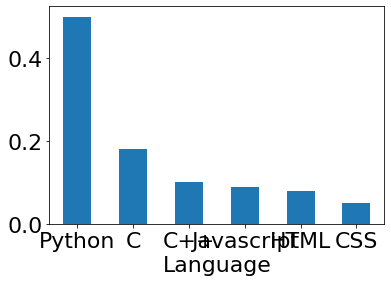

In [46]:
import matplotlib.pyplot as plt


os.chdir(pathProjects)

# a simple line plot
dfLanguages.plot(kind='bar',x='Language',y='Files Commit',legend=None)

plt.xticks(rotation=0, horizontalalignment="center")
# the plot gets saved to 'output.png'
plt.savefig('barplot.png')
#df.groupby('state')['name'].nunique().plot(kind='bar')

In [47]:
dfLanguages=dfLanguages.head(5)
dfLanguages

,Language,Files Commit
6,Python,0.50
9,C,0.18
10,C++,0.10
5,Javascript,0.09
3,HTML,0.08


In [48]:
# Join two dataset: loc and percent 

dfLoc = dfLoc.rename(columns={'Loc': '#Loc'})
dfLocPercent=dfLocPercent.rename(columns={'Loc': '%'})

dfLoConcat=pd.concat([dfLoc, dfLocPercent], axis=1)

dfLoConcat["%"] = dfLoConcat["%"].fillna(0)
dfLoConcat=dfLoConcat.sort_values(by=['%'],ascending=False)

#dfLoConcat=dfLoConcat.sort_values(by=['#Loc'], ascending=False)

dfLoConcat.head()

,Language,#Loc,%
3,HTML,86962,0.42
9,C,54705,0.26
5,Javascript,25862,0.12
6,Python,14161,0.07
10,C++,13261,0.06


In [49]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud

if len(commit_data2.columns) != 0:
    os.chdir(pathProjectsO)
    mpl.rcParams['font.size']=12                
    mpl.rcParams['savefig.dpi']=100             
    mpl.rcParams['figure.subplot.bottom']=.1 


    #stopwords = set(STOPWORDS)
    #data = pd.read_csv("../input/most_backed.csv")
    dfnewTeste = dff['Second']
    #dfnewTeste = dfnewTeste['Second'].values 


    #wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40,random_state=42).generate(str(dfnewTeste))
    wordcloud = WordCloud(background_color='white').generate(str(dfnewTeste))

    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    fig.savefig("word1.png", dpi=900)
    plt.show()

In [50]:
if len(commit_data2.columns) != 0:

    uniqueValues =pd.DataFrame(newDtfLibraries)
    uniqueValues=uniqueValues.drop_duplicates(['First'])
    uniqueValues.head(5)

In [51]:
if len(commit_data2.columns) != 0:
    dn=newDtfLibraries.groupby(["First"]).size().reset_index(name="Amount")
    dn = dn[~dn['First'].isin(['//','/*',''])]
    dn = dn.sort_values(['Amount'], ascending=[False])
    dn['First'] = dn['First'].str.strip()
    #df.iloc[0,0:3]
    #x=dn[dn.First == 'jargs'].Amount

In [52]:
#Get qnt languages
dfLanguages.Language.count()

5

In [53]:
#FIles commit
dfLanguages['Files Commit'] =(round(dfLanguages['Files Commit']*100, 2)).astype(str) + '%'
dfLanguages

/home/johnatan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Language,Files Commit
6,Python,50.0%
9,C,18.0%
10,C++,10.0%
5,Javascript,9.0%
3,HTML,8.0%


In [54]:
#Lines of COde 
dfLoConcat= dfLoConcat[dfLoConcat['%'] != 0]
dfLoConcat['%'] =(round(dfLoConcat['%']*100, 2)).astype(str) + '%'


dfLoConcat

,Language,#Loc,%
3,HTML,86962,42.0%
9,C,54705,26.0%
5,Javascript,25862,12.0%
6,Python,14161,7.0%
10,C++,13261,6.0%
2,CSS,12738,6.0%


In [55]:
for index, row in dfLanguages.iterrows():
    print (row["Language"])

Python
C
C++
Javascript
HTML


In [56]:
for index, row in dfLanguages.iterrows():
    print (row["Files Commit"])

50.0%
18.0%
10.0%
9.0%
8.0%


In [57]:
docHtmlLangCom=''
for index, row in dfLanguages.iterrows():
    docHtmlLangCom+=''' <h5>'''+row["Language"]+'''</h5>
                        <div class="progress">
                           <div class="progress-bar" role="progressbar" aria-valuenow="30" aria-valuemin="0" aria-valuemax="100" style="width:'''+row["Files Commit"]+'''">'''+str(row["Files Commit"])+'''
                           </div>
                        </div>'''
print(docHtmlLangCom)

 <h5>Python</h5>
                        <div class="progress">
                           <div class="progress-bar" role="progressbar" aria-valuenow="30" aria-valuemin="0" aria-valuemax="100" style="width:50.0%">50.0%
                           </div>
                        </div> <h5>C</h5>
                        <div class="progress">
                           <div class="progress-bar" role="progressbar" aria-valuenow="30" aria-valuemin="0" aria-valuemax="100" style="width:18.0%">18.0%
                           </div>
                        </div> <h5>C++</h5>
                        <div class="progress">
                           <div class="progress-bar" role="progressbar" aria-valuenow="30" aria-valuemin="0" aria-valuemax="100" style="width:10.0%">10.0%
                           </div>
                        </div> <h5>Javascript</h5>
                        <div class="progress">
                           <div class="progress-bar" role="progressbar" aria-valuenow="30" 

In [58]:
docHtmlLangLoc=''
for index, row in dfLoConcat.iterrows():
    docHtmlLangLoc+=''' <h5>'''+row["Language"]+'''</h5>
                        <div class="progress">
                           <div class="progress-bar" role="progressbar" aria-valuenow="30" aria-valuemin="0" aria-valuemax="100" style="width:'''+row["%"]+'''">'''+str(row["%"])+'''
                           </div>
                        </div>'''
print(docHtmlLangLoc)

 <h5>HTML</h5>
                        <div class="progress">
                           <div class="progress-bar" role="progressbar" aria-valuenow="30" aria-valuemin="0" aria-valuemax="100" style="width:42.0%">42.0%
                           </div>
                        </div> <h5>C</h5>
                        <div class="progress">
                           <div class="progress-bar" role="progressbar" aria-valuenow="30" aria-valuemin="0" aria-valuemax="100" style="width:26.0%">26.0%
                           </div>
                        </div> <h5>Javascript</h5>
                        <div class="progress">
                           <div class="progress-bar" role="progressbar" aria-valuenow="30" aria-valuemin="0" aria-valuemax="100" style="width:12.0%">12.0%
                           </div>
                        </div> <h5>Python</h5>
                        <div class="progress">
                           <div class="progress-bar" role="progressbar" aria-valuenow="30"

In [59]:
if(len(commit_data2.columns)!= 0):
    dff['Second']=dff['Second'].str.split('.').str[-1]
    docHtmlDf=dff.head(5).to_html(index=False)
else:
    docHtmlDf=""

In [60]:
if(len(commit_data2.columns)!= 0):
    dfLibrarySubPath['Second']=dfLibrarySubPath['Second'].str.split('.').str[-1]
    docHtmlDfPath=dfLibrarySubPath.to_html(index=False)
    docHtmlWordCl='<img src="word1.png" alt="Mountains" style="width:100%">'
    docHtmlLib='''<div class="column">
                  <center><h2>Library Intensity</h2></center>
                    '''+docHtmlDf+'''
                  </div>
                  <div class="column">
                  <center><h2>Library Extensive</h2></center>
                    '''+docHtmlDfPath+'''
                  </div>
                  <div class="column">
                  <center><h2>Subpackage-Library</h2></center>
                    '''+docHtmlWordCl+'''
                  </div>'''
else:
    docHtmlDfPath=""
    docHtmlWordCl=""
    docHtmlLib=''

In [61]:
message = '''<!DOCTYPE html>
<html lang="en">
   <head>
      <meta charset="utf-8">
      <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
      <meta name="description" content="">
      <meta name="author" content="">
      <title>Skills</title>
      <!-- Bootstrap core CSS -->
      <link href="../../template/vendor/bootstrap/css/bootstrap.min.css" rel="stylesheet">
      <!-- Custom styles for this template -->
      <link href="../../template/css/scrolling-nav.css" rel="stylesheet">
   </head>
   <body id="page-top">
      <center>
         <!-- Navigation -->
         <nav class="navbar navbar-expand-lg navbar-dark bg-dark fixed-top" id="mainNav">
            <div class="container">
               <a class="navbar-brand js-scroll-trigger" href="#page-top">Home</a>
               <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarResponsive" aria-controls="navbarResponsive" aria-expanded="false" aria-label="Toggle navigation">
               <span class="navbar-toggler-icon"></gitUserNamespan>
               </button>
               <div class="collapse navbar-collapse" id="navbarResponsive">
                  <ul class="navbar-nav ml-auto">
                     <li class="nav-item">
                        <a class="nav-link js-scroll-trigger" href="#about">About</a>
                     </li>
                  </ul>
               </div>
            </div>
         </nav>
         <header class="bg-primary text-white">
            <div class="container text-center">
               <a href="https://github.com/'''+gitUserName+'''">
               <img alt="Qries" src='''+avatar_url+''' width="150" height="150">
               </a>
               <h1>'''+authorTarget+'''</h1>
               <h4>'''+gitUserName+'''</h4>
            </div>
         </header>
         <section id="about">
   <div class="container">
     
     <div class="box">
     
     <div id = "boxes"> 
            <div id = "titleLang">

                <h1 style="height:10%;text-align:center;position:relative;top:40%;">Languages</h1>

              </div>
            <div id = "leftbox"> 
                <h2>Option A</h2> 
                '''+docHtmlLangCom+''' 
            </div>  
              
            <div id = "middlebox"> 
                <h2>Option B</h2> 
               '''+docHtmlLangLoc+'''
            </div> 
              
            
        </div> 
        
     <div id = "boxes"> 
            <div id = "titleLang">
                <h1 style="height:10%;text-align:left;position:relative;top:40%;">Backend and Frontend</h1>
              </div>
            <div id = "leftboxE"> 
                <h2>Option A</h2> 
                     <img src="backfrontCommits.png" style="width:70%">
            </div>  
            <div id = "middleboxE"> 
                <h2>Option B</h2> 
                 <img src="backfrontLoc.png" style="width:70%">
            </div> 
        </div> 
        
         <div id = "boxes"> 
            <div id = "titleLang">
                <h1 style="height:1%;text-align:center;position:relative;top:10%;">Test-Development</h1>
              </div>
            <div id = "leftboxE"> 
                <h2>Option A</h2> 
               <img src="fileCommitTest.png" style="width:70%">
            </div>  
            <div id = "middleboxE"> 
                <h2>Option B</h2> 
               <img src='''+locTestPng+''' style="width:70%">
              </div>
         </div>

      </div>
   </div>
     
     
     
     
   
</section>
         <!-- Footer -->
         <footer class="py-5 bg-dark">
            <div class="container">
               <p class="m-0 text-center text-white">Copyright &copy; JExpert 2.0 2020</p>
            </div>
            <!-- /.container -->
         </footer>
         <!-- Bootstrap core JavaScript -->
         <script src="vendor/jquery/jquery.min.js"></script>
         <script src="vendor/bootstrap/js/bootstrap.bundle.min.js"></script>
         <!-- Plugin JavaScript -->
         <script src="vendor/jquery-easing/jquery.easing.min.js"></script>
         <!-- Custom JavaScript for this theme -->
         <script src="js/scrolling-nav.js"></script>
      </center>
   </body>
</html>'''


In [62]:
from IPython.core.display import display, HTML
display(HTML(message))
os.chdir(pathProjectsO)

with open(authorTarget+".html", "w") as file:file.write(message)

In [63]:
import pdfkit 
os.chdir(pathProjectsO)


try:
    #pdfkit.from_file(authorTarget+".html", "/home/johnatan/Downloads/"+gitUserName+".pdf") 
    pdfkit.from_file(authorTarget+".html", "/media/johnatan/SAMSUNG/toSend/"+gitUserName+".pdf") 
except:
    print("pdf")

pdf


In [64]:
import csv 

#emails=commit_dataEmail.drop_duplicates(['email'])

email=commit_data['author'].iloc[0]

row_list = [[gitUserName, email]]

with open('/media/johnatan/SAMSUNG/emails2.csv', 'a', newline='') as file: 
    writer = csv.writer(file, quoting=csv.QUOTE_NONNUMERIC, delimiter=';') 
    writer.writerows(row_list)

In [65]:
import os
duration = 2 # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

#dir_path="/media/johnatan/SAMSUNG/SANER2021/"+gitUserName+"/"

#import shutil

#shutil.rmtree(dir_path, ignore_errors=True)

print(gitUserName)

arora-aditya
